# Unidad 3 · Probabilidad y variables aleatorias.

Curso: **Estadística con Python**  

**Objetivo:** sucesos y eventos con sympy y random. Distribuciones discretas (binomial, bernouilli, poisson) y contínuas (normal y chi-quadrado).Visualización de variables de densidad y probabilidad.

## 1. Instalación de Sympy

La instalación de Sympy es muy sencilla

In [ ]:
pip install sympy

## 2. Sucesos y eventos.

En `Sympy` podemos definir espacios de probabilidad y eventos. Los eventos se expresan como condiciones sobre variables aleatorias. Por ejemplo, el evento de lanzar una moneda:

In [ ]:
from sympy.stats import Bernoulli, P, E
from sympy import Eq, S # S() convierte números a objetos SymPy (ej. S(0.5))

# 1. Definir una variable aleatoria para el lanzamiento de una moneda
# Bernoulli(nombre, p) -> p es la probabilidad de éxito (1)
# Aquí, 1 para "cara" y 0 para "cruz".
coin_flip = Bernoulli('C', S(1)/2) # Probabilidad de cara = 0.5

print(f"Probabilidad de obtener cara (1): {P(Eq(coin_flip, 1))}")
print(f"Probabilidad de obtener cruz (0): {P(Eq(coin_flip, 0))}")
print(f"Esperanza del lanzamiento: {E(coin_flip)}")

# Eventos más complejos:
# ¿Cuál es la probabilidad de que NO sea cara?
print(f"Probabilidad de NO obtener cara: {P(coin_flip != 1)}")

Probabilidad de obtener cara (1): 1/2
Probabilidad de obtener cruz (0): 1/2
Esperanza del lanzamiento: 1/2
Probabilidad de NO obtener cara: 1


## 3. Distribuciones Discretas

### 3.1 Distribución de Bernoulli

Modela un único ensayo con dos resultados posibles: éxito o fracaso


--- Distribución de Bernoulli (p=0.700000000000000) ---
Esperanza: 0.700000000000000
Varianza: 0.210000000000000
P(X_bernoulli = 1): 0.700000000000000
P(X_bernoulli = 0): 0.300000000000000
PMF: {0: 0.300000000000000, 1: 0.700000000000000}


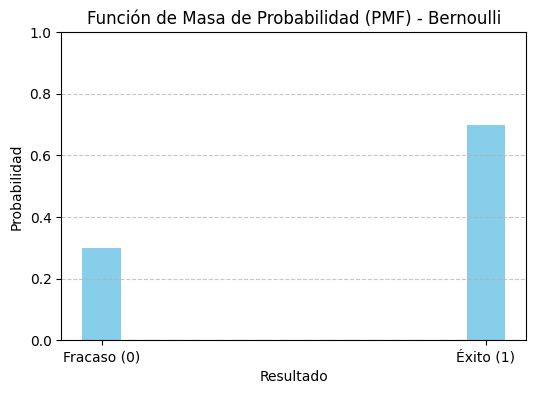

In [ ]:
from sympy.stats import Bernoulli, P, E, density
from sympy import Symbol, S, Eq
import matplotlib.pyplot as plt
import numpy as np

# Definir la variable aleatoria Bernoulli
p_bernoulli = S(0.7) # Probabilidad de éxito
X_bernoulli = Bernoulli('X_bernoulli', p_bernoulli)

print(f"\n--- Distribución de Bernoulli (p={p_bernoulli}) ---")
print(f"Esperanza: {E(X_bernoulli)}")
print(f"Varianza: {E(X_bernoulli**2) - E(X_bernoulli)**2}")


# Probabilidades de eventos
print(f"P(X_bernoulli = 1): {P(Eq(X_bernoulli, 1))}")
print(f"P(X_bernoulli = 0): {P(Eq(X_bernoulli, 0))}")


# Visualización de la PMF
pmf_bernoulli = density(X_bernoulli).dict
print(f"PMF: {pmf_bernoulli}")

# Convert SymPy numbers to floats for plotting
estados = [float(estado) for estado in pmf_bernoulli.keys()]
probabilidades = [float(prob) for prob in pmf_bernoulli.values()]


plt.figure(figsize=(6, 4))
plt.bar(estados, probabilidades, width=0.1, align='center', color='skyblue')
plt.xticks(estados, ['Fracaso (0)', 'Éxito (1)'])
plt.title('Función de Masa de Probabilidad (PMF) - Bernoulli')
plt.xlabel('Resultado')
plt.ylabel('Probabilidad')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.2 Distribución binomial

Modela el número de éxitos en una secuencia fija de `n` ensayos de Bernoulli independientes.




--- Distribución Binomial (n=10, p=0.300000000000000) ---
Esperanza: 3.00000000000000
Varianza: 2.10000000000000
P(X_binomial = 3): 0.266827932000000
P(X_binomial < 2): 0.149308345900000


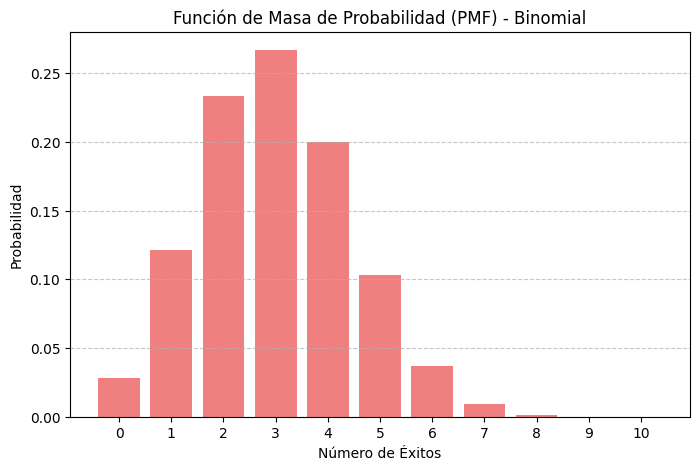

In [ ]:
from sympy.stats import Binomial, P, E, density
from sympy import Symbol, S, Eq
import matplotlib.pyplot as plt
import numpy as np

# Definir la variable aleatoria Binomial
n_binomial = 10     # Número de ensayos
p_binomial = S(0.3) # Probabilidad de éxito en cada ensayo
X_binomial = Binomial('X_binomial', n_binomial, p_binomial)

print(f"\n--- Distribución Binomial (n={n_binomial}, p={p_binomial}) ---")
print(f"Esperanza: {E(X_binomial)}")
print(f"Varianza: {E(X_binomial**2) - E(X_binomial)**2}")

# Probabilidad de obtener exactamente 3 éxitos
print(f"P(X_binomial = 3): {P(Eq(X_binomial, 3))}")

# Probabilidad de obtener menos de 2 éxitos (0 o 1)
print(f"P(X_binomial < 2): {P(X_binomial < 2)}")

# Visualización de la PMF
pmf_binomial = density(X_binomial).dict
# print(f"PMF: {pmf_binomial}") # Puede ser largo para n grande


probabilidades = [float(p) for p in pmf_binomial.values()] # Convertir SymPy Float a Python float
estados = [float(estado) for estado in estados] # Convertir SymPy objects to float for xticks

plt.figure(figsize=(8, 5))
plt.bar(estados, probabilidades, color='lightcoral') # Use float values for plotting
plt.title('Función de Masa de Probabilidad (PMF) - Binomial')
plt.xlabel('Número de Éxitos')
plt.ylabel('Probabilidad')
plt.xticks(estados) # Use float values for xticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.3 Distribución de Poisson

Modela el número de eventos que ocurren en un intervalo fijo de tiempo o espacio, si estos eventos ocurren con una tasa promedio constante e independiente del tiempo desde el último evento.


--- Distribución de Poisson (lambda=3) ---
Esperanza: 3
Varianza: 3
P(X_poisson = 2): 9*exp(-3)/2
P(X_poisson >= 3): (-17/2 + exp(3))*exp(-3)


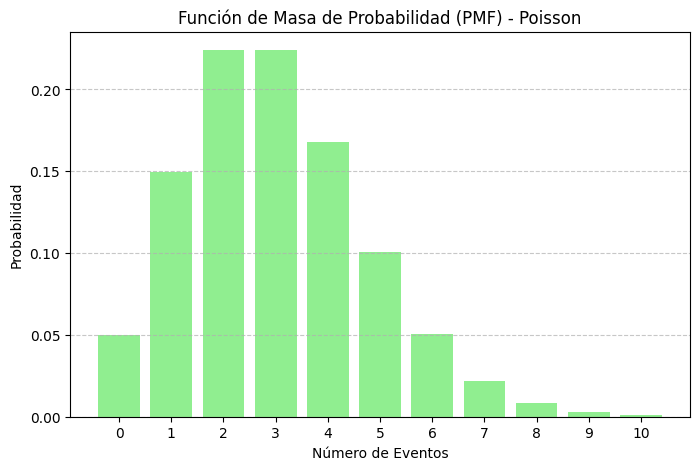

In [ ]:
from sympy.stats import Poisson, P, E, density
from sympy import Symbol, S, Eq
import matplotlib.pyplot as plt
import numpy as np
from sympy.plotting import plot

# Definir la variable aleatoria de Poisson
lambda_poisson = S(3) # Tasa promedio de ocurrencia de eventos
X_poisson = Poisson('X_poisson', lambda_poisson)

print(f"\n--- Distribución de Poisson (lambda={lambda_poisson}) ---")
print(f"Esperanza: {E(X_poisson)}")
print(f"Varianza: {E(X_poisson**2) - E(X_poisson)**2}")

# Probabilidad de que ocurran exactamente 2 eventos
print(f"P(X_poisson = 2): {P(Eq(X_poisson, 2))}")

# Probabilidad de que ocurran 3 o más eventos
print(f"P(X_poisson >= 3): {P(X_poisson >= 3)}")


# Calculate probabilities for a range of k values
max_k = 10 # Limit the range for visualization
estados = list(range(max_k + 1))
probabilidades = [float(P(Eq(X_poisson, k))) for k in estados]


plt.figure(figsize=(8, 5))
plt.bar(estados, probabilidades, color='lightgreen')
plt.title('Función de Masa de Probabilidad (PMF) - Poisson')
plt.xlabel('Número de Eventos')
plt.ylabel('Probabilidad')
plt.xticks(estados)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Distribuciones continuas

### 4.1 Distribución Normal (Gaussiana)

Una de las distribuciones más importantes. Caracterizada por su media (μ) y desviación estándar (σ).


--- Distribución Normal (mu=0, sigma=1) ---
Esperanza: 0
Varianza: 1
P(-1 < X_normal < 1): 0.682689492137086
PDF de X_normal: sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))


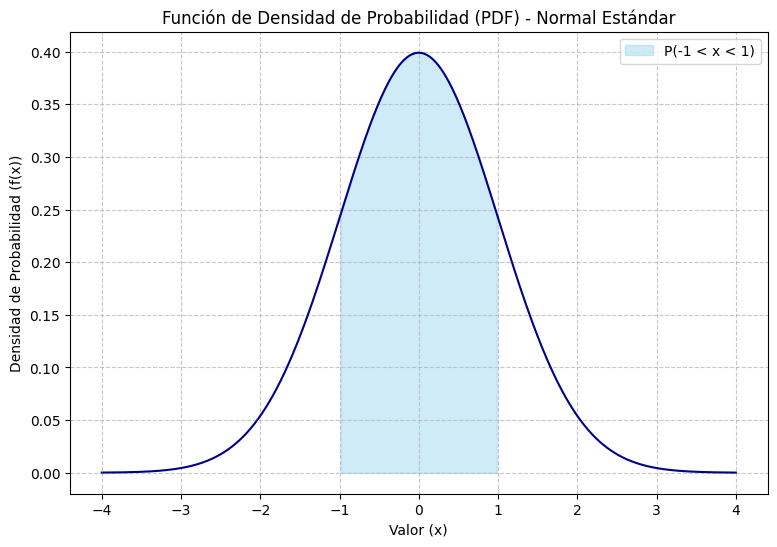

In [ ]:
from sympy.stats import Normal, P, E, density
from sympy import Symbol, S, exp, pi, sqrt, integrate, oo, lambdify
import matplotlib.pyplot as plt
import numpy as np

# Definir la variable aleatoria Normal
mu_normal = S(0)        # Media
sigma_normal = S(1)     # Desviación estándar
X_normal = Normal('X_normal', mu_normal, sigma_normal)

print(f"\n--- Distribución Normal (mu={mu_normal}, sigma={sigma_normal}) ---")
print(f"Esperanza: {E(X_normal)}")
print(f"Varianza: {E(X_normal**2) - E(X_normal)**2}")

# Probabilidad de que X esté entre -1 y 1
# SymPy usará la función erf (función de error)
prob_normal_interval = P( (X_normal > -1) & (X_normal < 1) )
print(f"P(-1 < X_normal < 1): {prob_normal_interval.evalf()}") # .evalf() para valor numérico

# Obtener la Función de Densidad de Probabilidad (PDF)
x_sym = Symbol('x')
pdf_normal_expr = density(X_normal)(x_sym)
print(f"PDF de X_normal: {pdf_normal_expr}")

# Visualización de la PDF
x_vals = np.linspace(-4, 4, 500)
# Convertir la expresión SymPy a una función numérica
pdf_normal_func = lambdify(x_sym, pdf_normal_expr, 'numpy')
y_vals = pdf_normal_func(x_vals)

plt.figure(figsize=(9, 6))
plt.plot(x_vals, y_vals, color='darkblue')
plt.title('Función de Densidad de Probabilidad (PDF) - Normal Estándar')
plt.xlabel('Valor (x)')
plt.ylabel('Densidad de Probabilidad (f(x))')
plt.grid(True, linestyle='--', alpha=0.7)
plt.fill_between(x_vals, y_vals, where=(x_vals > -1) & (x_vals < 1), color='skyblue', alpha=0.4, label='P(-1 < x < 1)')
plt.legend()
plt.show()

**NOTA IMPORTANTE**
`P(condición)` para distribuciones continuas implica integración, que `SymPy` resuelve de forma simbólica, a menudo resultando en expresiones con funciones especiales como `erf` (función de error). `evalf()` es crucial para obtener el valor numérico.

### 4.2 Distribución Chi-Cuadrado

Surgida en la inferencia estadística, especialmente en pruebas de hipótesis y construcción de intervalos de confianza. Tiene un único parámetro: los grados de libertad (k).


--- Distribución Chi-Cuadrado (k=3) ---
Esperanza: 3
Varianza: 6
P(X_chi2 > 4): 0.261464129949111
PDF de X_chi2: sqrt(2)*sqrt(x)*exp(-x/2)/(2*sqrt(pi))


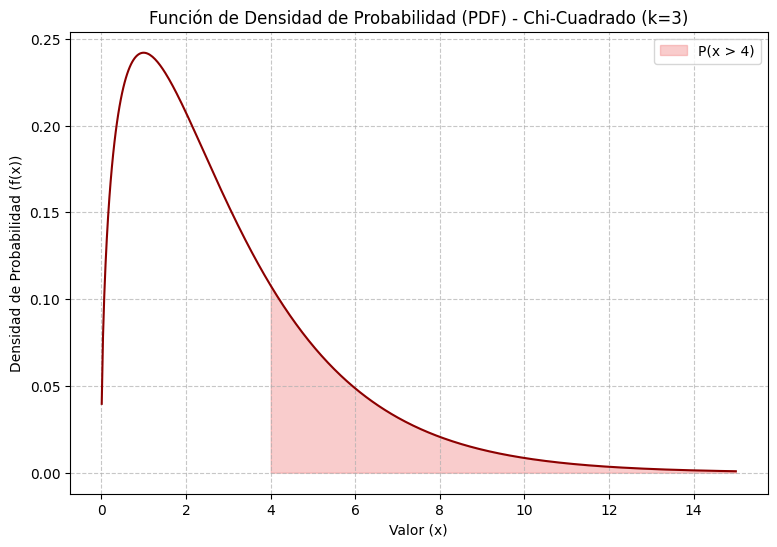

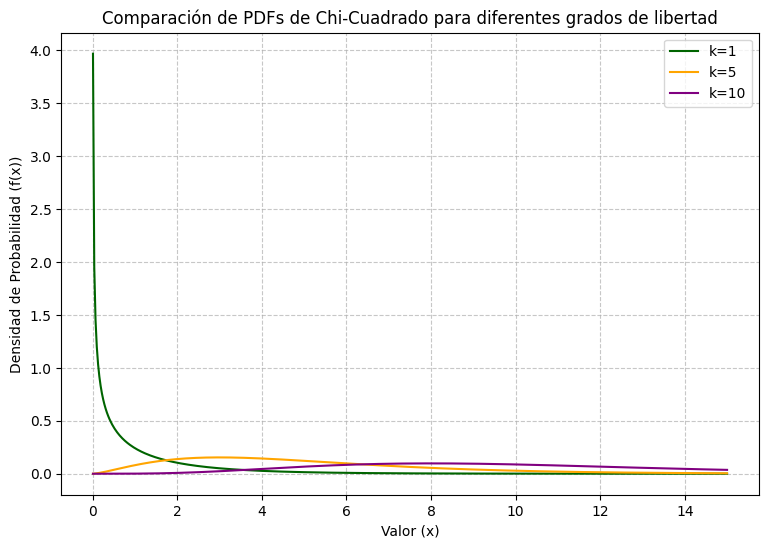

In [ ]:
from sympy.stats import ChiSquared, P, E, density
from sympy import Symbol, S, exp, gamma
import matplotlib.pyplot as plt
import numpy as np
import sympy

# Definir la variable aleatoria Chi-Cuadrado
k_chi2 = 3 # Grados de libertad
X_chi2 = ChiSquared('X_chi2', k_chi2)

print(f"\n--- Distribución Chi-Cuadrado (k={k_chi2}) ---")
print(f"Esperanza: {E(X_chi2)}")
print(f"Varianza: {E(X_chi2**2) - E(X_chi2)**2}")

# Probabilidad de que X_chi2 sea mayor que 4
prob_chi2_gt_4 = P(X_chi2 > 4)
print(f"P(X_chi2 > 4): {prob_chi2_gt_4.evalf()}") # evalf() para valor numérico

# Obtener la Función de Densidad de Probabilidad (PDF)
x_sym = Symbol('x', positive=True) # x debe ser positivo para Chi-Cuadrado
pdf_chi2_expr = density(X_chi2)(x_sym)
print(f"PDF de X_chi2: {pdf_chi2_expr}")

# Visualización de la PDF
x_vals = np.linspace(0.01, 15, 500) # Chi-Cuadrado solo para valores positivos
pdf_chi2_func = sympy.lambdify(x_sym, pdf_chi2_expr, 'numpy')
y_vals = pdf_chi2_func(x_vals)

plt.figure(figsize=(9, 6))
plt.plot(x_vals, y_vals, color='darkred')
plt.title(f'Función de Densidad de Probabilidad (PDF) - Chi-Cuadrado (k={k_chi2})')
plt.xlabel('Valor (x)')
plt.ylabel('Densidad de Probabilidad (f(x))')
plt.grid(True, linestyle='--', alpha=0.7)
plt.fill_between(x_vals, y_vals, where=(x_vals > 4), color='lightcoral', alpha=0.4, label='P(x > 4)')
plt.legend()
plt.show()

# --- Ejemplo con diferentes grados de libertad para comparación ---
k_chi2_low = 1
k_chi2_medium = 5
k_chi2_high = 10

X_chi2_low = ChiSquared('X_chi2_low', k_chi2_low)
X_chi2_medium = ChiSquared('X_chi2_medium', k_chi2_medium)
X_chi2_high = ChiSquared('X_chi2_high', k_chi2_high)

pdf_chi2_low_expr = density(X_chi2_low)(x_sym)
pdf_chi2_medium_expr = density(X_chi2_medium)(x_sym)
pdf_chi2_high_expr = density(X_chi2_high)(x_sym)

pdf_chi2_low_func = sympy.lambdify(x_sym, pdf_chi2_low_expr, 'numpy')
pdf_chi2_medium_func = sympy.lambdify(x_sym, pdf_chi2_medium_expr, 'numpy')
pdf_chi2_high_func = sympy.lambdify(x_sym, pdf_chi2_high_expr, 'numpy')

y_vals_low = pdf_chi2_low_func(x_vals)
y_vals_medium = pdf_chi2_medium_func(x_vals)
y_vals_high = pdf_chi2_high_func(x_vals)

plt.figure(figsize=(9, 6))
plt.plot(x_vals, y_vals_low, label=f'k={k_chi2_low}', color='darkgreen')
plt.plot(x_vals, y_vals_medium, label=f'k={k_chi2_medium}', color='orange')
plt.plot(x_vals, y_vals_high, label=f'k={k_chi2_high}', color='purple')
plt.title('Comparación de PDFs de Chi-Cuadrado para diferentes grados de libertad')
plt.xlabel('Valor (x)')
plt.ylabel('Densidad de Probabilidad (f(x))')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

** NOTA IMPORTANTE **

Una nota sobre la función `sympy.lambdify`: Es una herramienta muy útil para convertir expresiones simbólicas de `SymPy` en funciones que pueden ser evaluadas numéricamente por `NumPy`, lo cual es esencial para la visualización con `Matplotlib`.

## 5. Práctica:

Aplicamos el concepto de probabilidad para medir el riesgo de invertir en acciones mediante el análisis de la distribución del logaritmo de la rentabilidad diaria con Python.

Poner enunciado y sacar esta parte de aquí: https://github.com/PeterSchuld/HKUST-Python_and_Statistics_for_Financial_Analysis/blob/main/W2_Random_variables_and_distribution/Models%2Bof%2BStock%2BReturn.ipynb





Primero necesitamos importar los módulos necesarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos el dataset

In [ ]:
ms = pd.read_csv('microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


Vamos a calcular el retorno logarítmico diario, una forma de medir el cambio porcentual en el precio de un activo financiero de un día para otro. Se calcula tomando el logaritmo natural del ratio entre el precio de cierre de un día y el precio de cierre del día anterior.

La fórmula es la siguiente:

$$ \text{LogReturn}_t = \ln\left(\frac{P_t}{P_{t-1}}\right) $$

Donde:
- $P_t$ es el precio de cierre en el día $t$.
- $P_{t-1}$ es el precio de cierre en el día $t-1$.
- $\ln$ es el logaritmo natural.

**¿Por qué usar el Log Return en lugar del Simple Daily Return?**

El Simple Daily Return se calcula como $\frac{P_t - P_{t-1}}{P_{t-1}}$ o $\frac{P_t}{P_{t-1}} - 1$.

Aunque el Simple Daily Return es intuitivo, el Log Daily Return tiene propiedades matemáticas que lo hacen más conveniente para ciertos análisis, especialmente cuando se trabaja con series temporales de retornos:

1.  **Simetría:** Los retornos logarítmicos son simétricos alrededor de cero. Un retorno positivo del 10% y un retorno negativo del 10% tienen la misma magnitud en la escala logarítmica. En cambio, con los retornos simples, una caída del 10% requiere una subida de más del 11.1% para recuperar el valor original.
2.  **Aditividad:** Los retornos logarítmicos son aditivos a lo largo del tiempo. El retorno logarítmico de un período más largo es simplemente la suma de los retornos logarítmicos de los subperíodos. Esto simplifica cálculos como el retorno total durante varios días o la anualización de retornos. Los retornos simples, en cambio, son multiplicativos.
3.  **Relación con la Distribución Normal:** Los retornos logarítmicos tienden a estar más cerca de una distribución normal que los retornos simples, especialmente para cambios de precios pequeños. Esto es importante porque muchos modelos financieros asumen normalidad.
4.  **Pequeños Cambios:** Para pequeños cambios porcentuales, el Log Daily Return es aproximadamente igual al Simple Daily Return.

En resumen, el Log Daily Return es una métrica estándar en finanzas para analizar series temporales de precios debido a sus propiedades matemáticas que simplifican el análisis y modelado estadístico.

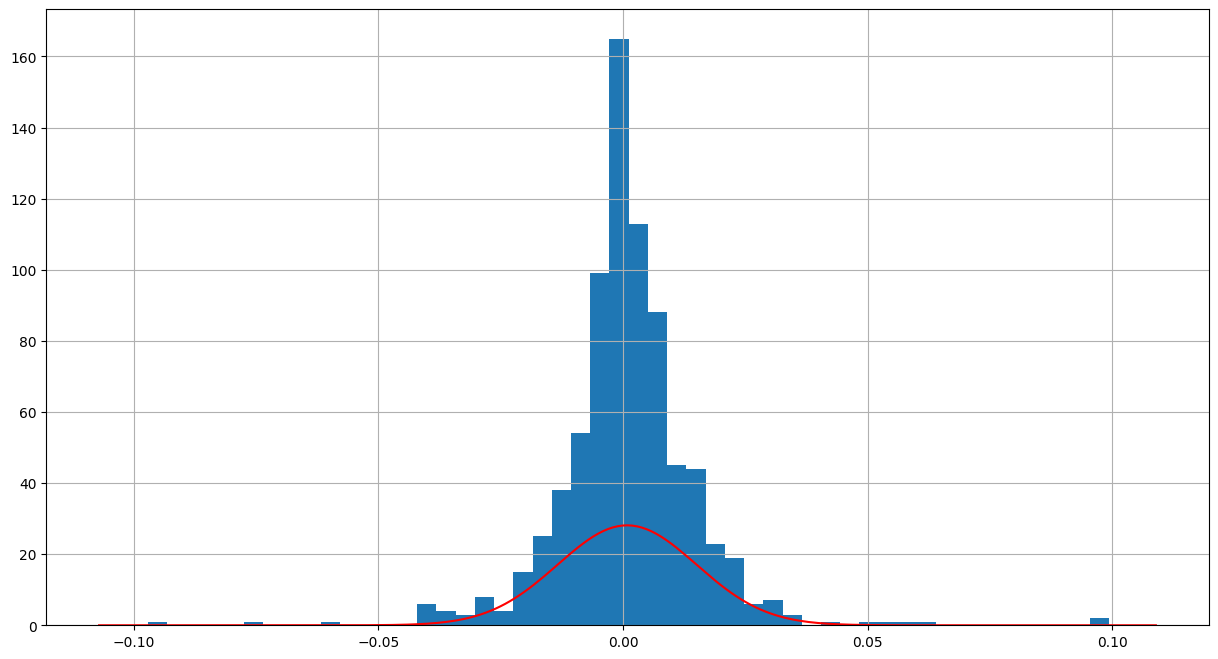

In [ ]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

Se parece bastante a una distribución normal. Calculemos el porcentaje de que el precio de las acciones caiga un cierto porcentaje en un día

In [ ]:
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('La probabilidad de que caiga un 5% es ', prob_return1)
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('La probabilidad de que caiga un 10% es ', prob_return1)

La probabilidad de que caiga un 5% es  0.00017118482608677817
La probabilidad de que caiga un 10% es  6.056775634858521e-13


Calcula la probabilidad de que caiga un cierto porcentaje en un año.

* Media (Esperanza): Si tienes una serie de variables aleatorias independientes e idénticamente distribuidas (como los retornos logarítmicos diarios), la media de la suma de estas variables es la suma de sus medias. Si el retorno logarítmico diario promedio es $\mu_{diario}$, entonces el retorno logarítmico promedio durante 365 días será la suma de las 365 medias diarias: $$ \mu_{anual} = \sum_{i=1}^{365} \mu_{diario} = 365 \times \mu_{diario} $$.

* Varianza y Desviación Estándar: Para variables aleatorias independientes, la varianza de la suma es la suma de las varianzas. Si la varianza del retorno logarítmico diario es $\sigma^2_{diario}$, entonces la varianza del retorno logarítmico durante 365 días será la suma de las 365 varianzas diarias: $$ \sigma^2_{anual} = \sum_{i=1}^{365} \sigma^2_{diario} = 365 \times \sigma^2_{diario} $$ La desviación estándar es la raíz cuadrada de la varianza. Por lo tanto, la desviación estándar anual es: $$ \sigma_{anual} = \sqrt{\sigma^2_{anual}} = \sqrt{365 \times \sigma^2_{diario}} = \sqrt{365} \times \sqrt{\sigma^2_{diario}} = \sqrt{365} \times \sigma_{diario} $$.

In [ ]:
mu365 = 365*mu
sigma365 = (365**0.5) * sigma
print('La probabilidad de que caiga un 40% en 265 días es ', norm.cdf(-0.4, mu365, sigma365))
print('La probabilidad de que caiga un 20% en 265 días es ', norm.cdf(-0.2, mu365, sigma365))

La probabilidad de que caiga un 40% en 265 días es  0.004947719853220974
La probabilidad de que caiga un 20% en 265 días es  0.032750439990570694


Cálculo del * Value at Risk * (VaR)

In [ ]:
VaR = norm.ppf(0.05, mu, sigma)
print('Value at Risk de un solo día ', VaR)

Value at Risk de un solo día  -0.022523362407065


In [ ]:
# Quantile
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.022523362407065
95% quantile  0.024163825379311034


In [ ]:
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.008752057838414963
75% quantile  0.010392520810661006
